## Introdução

O mercado musical contemporâneo é caracterizado por uma complexa teia de relações entre artistas, produtores e outras figuras-chave da indústria. Dentro desse contexto, as colaborações entre artistas têm desempenhado um papel significativo na criação de novos sons, estilos e tendências. Neste projeto, propomos uma investigação aprofundada das redes de colaborações musicais, utilizando uma abordagem baseada em Redes Complexas.

O foco deste trabalho está na análise das conexões entre artistas, buscando compreender como essas relações impactam o mercado musical como um todo. Pretendemos explorar as colaborações musicais através da API do Spotify e aplicar o conceito de "6 graus de separação", buscando mapear as relações entre artistas em diferentes níveis de proximidade, revelando insights sobre a dinâmica do cenário musical.


## Configuração inicial

### Importação de pacotes

In [162]:
from google.colab import drive
import os

import numpy as np
import pandas as pd

import networkx as nx
import matplotlib.pyplot as plt

from statistics import mean

### Definição de ambiente

In [102]:
drive.mount('/content/drive', force_remount=True)
folder = '/content/drive/MyDrive/INF 791 (Redes Complexas)/etapa_1/'
os.chdir(folder)

Mounted at /content/drive


## Coleta de Dados

### a) Coleta de base de dados

#### Descrição

A partir da [API do Spotify](https://developer.spotify.com), uma fonte abrangente de informações musicais, foi coletada uma base composta por 21.415  artistas, 61.118  músicas e um total de 140.969 colaborações.

**Para essa implementação, filtrei apenas por artistas com "degree" <= 3, para facilitar os calculos computacionais, totalizando 2.388 artistas, 7.892 músicas e 18.021 colaborações**

Essa coleta foi realizada utilizando a rota [Get Artist's Top Tracks](https://developer.spotify.com/documentation/web-api/reference/get-an-artists-top-tracks), que nos fornece informações detalhadas sobre as músicas mais populares de cada artista.

Também coletamos dados adicionais, incluindo gêneros musicais, popularidades e números de seguidores dos artistas, bem como a popularidade de cada música.

A busca por dados foi iniciada a partir de um artista selecionado arbitrariamente e em seguida, foi aplicado uma abordagem de busca em largura para mapear as relações entre artistas até os 6 graus de separação, construindo assim uma rede complexa de conexões musicais.

Para iniciar a busca, o artista Kendrick Lamar que atualmente figura em segundo lugar no [Weekly Top Artists Global](https://charts.spotify.com/charts/view/artist-global-weekly/2024-05-09) do Spotify, o que o torna uma escolha relevante para nossa análise. A escolha desse ponto de partida nos permite explorar as colaborações musicais ao redor de um artista de destaque, oferecendo insights valiosos sobre as redes de conexões dentro da indústria musical.

O código utilizado para coleta pode ser encontrado [neste repositório do Github](https://github.com/jknvlvxs/6Dtify).

#### Importação da base de dados

##### Artistas


Como dito acima, para a base de artistas, foi escolhido um ponto de partida arbitrário, a partir do rapper Kendrick Lamar. Com isso, foi realizado uma busca conforme a rota citada anteriormente, que retorna uma lista com uma amostra de suas músicas de maiores sucessos na plataforma do Spotify.

Com isso, filtramos dentre essas músicas aquelas que possuiam colaborações com outros artistas indicados na plataforma. A partir disso, foi gerado uma busca em largura por esses artistas, onde o grau de separação, indicado por "degree" indica a distância em métricas de colaborações, determinado artista está de "Kendrick Lamar"

In [103]:
artists = pd.read_csv('artists_d3.csv')
artists

,id,name,genres,popularity,followers,degree,mined_at
0,2YZyLoL8N0Wb9xBt1NhZWg,Kendrick Lamar,"conscious hip hop,hip hop,rap,west coast rap",90,28656288,0,2024-05-13 00:25:23.576
1,3TVXtAsR1Inumwj472S9r4,Drake,"canadian hip hop,canadian pop,hip hop,pop rap,rap",93,87528011,1,2024-05-13 00:42:03.235
2,6l3HvQ5sa6mXTsMTB19rO5,J. Cole,"conscious hip hop,hip hop,north carolina hip h...",84,23445923,1,2024-05-13 00:42:03.304
3,7tYKF4w9nC0nq9CsPZTHyP,SZA,"pop,r&b,rap",88,19787815,1,2024-05-13 00:28:59.898
4,1RyvyyTE3xzB2ZywiAwp0i,Future,"atl hip hop,hip hop,rap,southern hip hop,trap",90,16941914,1,2024-05-13 00:28:59.885
...,...,...,...,...,...,...,...
2383,712ZtYak5pWK9RJjcyxdKl,Kenan Thompson,NaN,48,1182,3,2024-05-30 22:09:59.260
2384,41TccBHnkaVhhgCgl83JU8,Kandi Girl,NaN,42,1161,3,2024-05-30 22:09:58.386
2385,23Ul4QNOkm2gasKycag0UK,O.G.L.B.,NaN,45,1133,3,2024-05-30 22:09:58.439
2386,2JE4L1DVUHTozvwDFAQkZr,Velvet Cash,NaN,37,1109,3,2024-05-13 01:24:36.758


##### Músicas

As músicas foram buscadas através da rota de Get Artist's Top Tracks, sendo filtradas aquelas que possuiam colaborações entre diversos artistas. Nesse caso, além do nome da música, também é informado sua popularidade na plataforma

In [60]:
tracks = pd.read_csv('tracks_d3.csv')
tracks

,id,name,popularity,href
0,2tudvzsrR56uom6smgOcSf,Like That,95,https://api.spotify.com/v1/tracks/2tudvzsrR56u...
1,2OzhQlSqBEmt7hmkYxfT6m,Fortnight (feat. Post Malone),95,https://api.spotify.com/v1/tracks/2OzhQlSqBEmt...
2,7CyPwkp0oE8Ro9Dd5CUDjW,"One Of The Girls (with JENNIE, Lily Rose Depp)",93,https://api.spotify.com/v1/tracks/7CyPwkp0oE8R...
3,7bywjHOc0wSjGGbj04XbVi,LUNA,93,https://api.spotify.com/v1/tracks/7bywjHOc0wSj...
4,3w0w2T288dec0mgeZZqoNN,CARNIVAL,93,https://api.spotify.com/v1/tracks/3w0w2T288dec...
...,...,...,...,...
7887,0it28nL0kZdTBW6WFmisEB,Fiori sulla luna,0,https://api.spotify.com/v1/tracks/0it28nL0kZdT...
7888,6nBV4UODtigx9efGluX4au,Cheerful Boy - Remix,0,https://api.spotify.com/v1/tracks/6nBV4UODtigx...
7889,7w6kYzxP5LhllE3tBhh5Ix,Russian Roulette,0,https://api.spotify.com/v1/tracks/7w6kYzxP5Lhl...
7890,2xk7j5JLelbKEWt3JUX337,Victorious - Fergie & Sadrian Remix,0,https://api.spotify.com/v1/tracks/2xk7j5JLelbK...


##### Colaborações

As colaborações aqui serão apenas uma forma de conseguir identificar as relações entre os artistas (nós) e as músicas (arestas)

In [61]:
artists_tracks = pd.read_csv('artists_tracks_d3.csv')
artists_tracks

,artistsId,tracksId
0,0Y5tJX1MQlPlqiwlOH1tJY,42VsgItocQwOQC3XWZ8JNA
1,699OTQXzgjhIYAHMy9RyPD,42VsgItocQwOQC3XWZ8JNA
2,4xPQFgDA5M2xa0ZGo5iIsv,3w0w2T288dec0mgeZZqoNN
3,5K4W6rqBFWDnAN6FQUkS6x,3w0w2T288dec0mgeZZqoNN
4,7c0XG5cIJTrrAgEC3ULPiq,3w0w2T288dec0mgeZZqoNN
...,...,...
18016,02kJSzxNuaWGqwubyUba0Z,7B6kmb9U4BS1YqPrZzUO7s
18017,43UmVQp9qZILibJ5vHq21k,0Du6LKh7z90m2v4WhEoIVH
18018,2O2dI9lY9PnWtAa4OlrgMi,0Du6LKh7z90m2v4WhEoIVH
18019,43UmVQp9qZILibJ5vHq21k,7dSQHfnJSK0SzmPpiuNrlC


### b) Grafo a ser analisado

#### Descrição

A ideia inicial é de gerar um grafo baseado no conceito de [6 graus de separaçãp](https://en.wikipedia.org/wiki/Six_degrees_of_separation).

Conforme explicamos, possuímos as informações de artistas, músicas e colaborações.

A ideia é gerar um grafo onde os artistas serão os nós desses grafos, podendo usar os dados de 'popularidade' como peso para o artista.

As músicas, que possuem colaborações entre esses artistas serão utilizadas como arestas entre eles. Sendo assim, as colaborações serão utilizadas para determinar as relações existentes entre artistas e as diversas músicas que os correlacionam

#### Geração do grafo

In [124]:
G = nx.Graph()

for index, row in artists.iterrows():
    G.add_node(row['id'], name=row['name'], popularity=row['popularity'], degree=row['degree'])

In [125]:
for index, row in tracks.iterrows():
  collaborators = artists_tracks[artists_tracks['tracksId'] == row['id']]['artistsId'].tolist()

  for i in range(len(collaborators)):
        for j in range(i + 1, len(collaborators)):
            G.add_edge(collaborators[i], collaborators[j], weight=row['popularity'], name=row['name'].replace('$', 'S'))

In [126]:
print('Artistas/nodes: ', G.number_of_nodes())
print('Músicas/arestas: ', G.number_of_edges())

Artistas/nodes:  2388
Músicas/arestas:  11199


#### Plotando o grafo

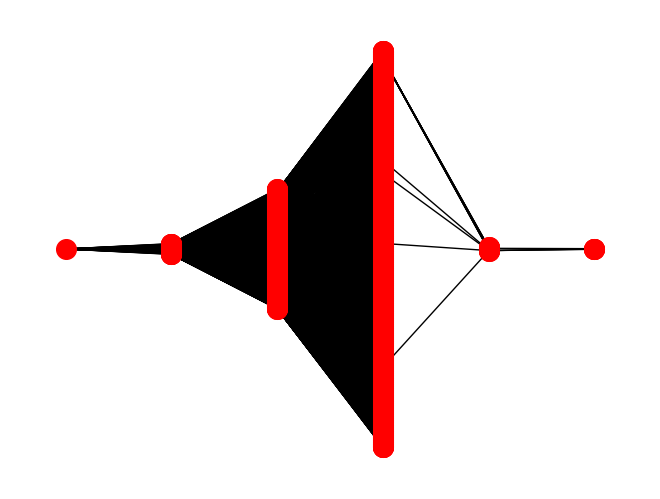

In [159]:
plt.figure(figsize=(12, 8))
sub = G.subgraph(nx.node_connected_component(G, n='2YZyLoL8N0Wb9xBt1NhZWg'))
pos = nx.bfs_layout(sub, start='2YZyLoL8N0Wb9xBt1NhZWg')

nx.draw(sub, pos, with_labels=False, node_color='blue', node_size=25, edge_color='black')

plt.show()

## Análise da rede complexa

### a) Forneça uma breve explicação da rede analisada.

A rede analisada consistirá em uma rede que possui um ponto inicial, que será o artista com `degree = 0`, para facilitar, podemos chamá-lo de pivô.

A partir disso, os artistas que possuem relação, ou seja, que possuem uma música colaborativa, com esse artista pivô, são marcados com `degree = 1`. Com isso, podemos gerar uma busca recursiva até chegarmos em artistas que possuem `degree = 3`.

Os artistas e as músicas, sendo nós e arestas, respectivamente, possuem uma métrica de "popularidade", informada pela própria plataforma do Spotify, que aqui poderá ser usada como forma de indicar peso para as mesmas.

### b) Calcule e plote a distribuição do grau dos nodos desse grafo. Calcule também o grau médio do grafo. Discuta os resultados.

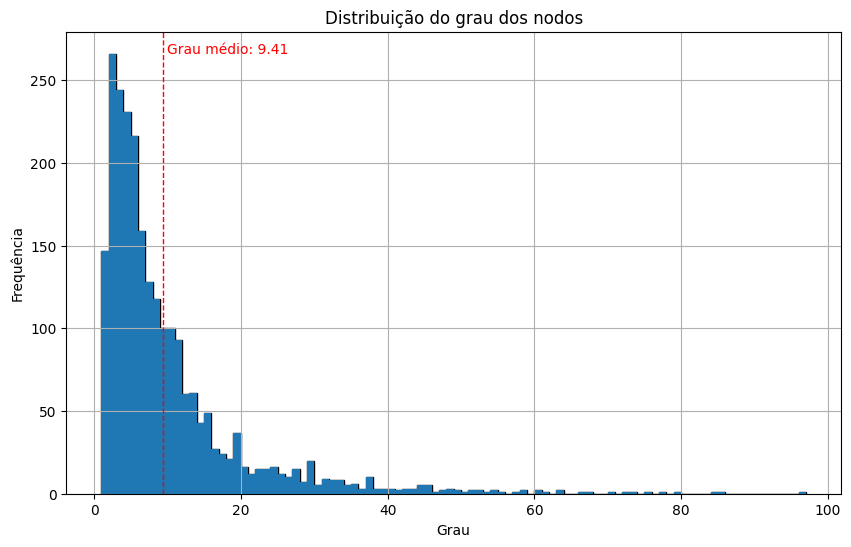

In [185]:
degrees = [degree for node, degree in sub.degree]

plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=range(min(degrees), max(degrees) + 1), color='skyblue', edgecolor='black')
plt.axvline(mean(degrees), color='red', linestyle='dashed', linewidth=1)

plt.title('Distribuição do grau dos nodos')
plt.xlabel('Grau')
plt.ylabel('Frequência')

plt.text(mean(degrees) + 0.5, max(plt.hist(degrees, bins=range(min(degrees), max(degrees) + 1))[0]), f'Grau médio: {mean(degrees):.2f}', color='red')

plt.grid(True)
plt.show()

O histograma da distribuição do grau dos nodos revela uma rede com predominância de artistas com poucas colaborações, evidenciada pelo baixo grau médio.

No entanto, a presença de outliers indica que alguns artistas têm um número significativamente maior de colaborações, agindo sendo pontos chaves dentro da rede, podendo influenciar fortemente a dinâmica de colaborações na indústria musical, sugerindo uma estrutura de rede desigual com implicações importantes para estratégias de marketing e propagação de novas músicas.

### c) Calcule o número de componentes do grafo.


In [182]:
nx.number_connected_components(sub)

1

Por se tratar de um grafo gerado a partir de uma busca em largura, espera-se que haja apenas um componente conexo.

Ao plotar a rede, optei por um plot usando a função `bfs_layout` e para isso tive de gerar um subgrafo a partir do nodo "pivô" para evitar erros que podem ter acontecido ao extrair a amostra parcial da base de dados



### d) Calcule o coeficiente de clusterizção de cada nodo e plote a distribuição. Calcule também o coeficiente de clusterização global do grafo.


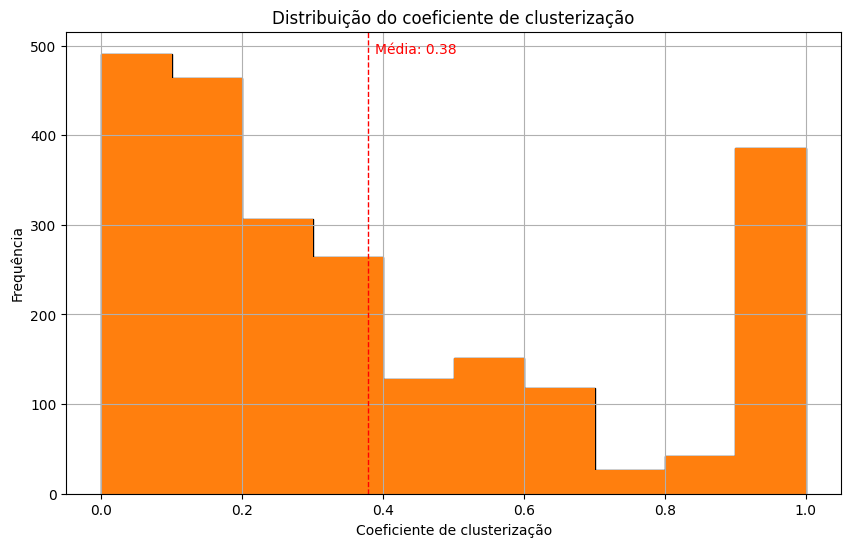

In [200]:
coefficients = [coefficient for node, coefficient in nx.clustering(sub).items()]
average_clustering = nx.average_clustering(G)

plt.figure(figsize=(10, 6))
plt.hist(coefficients, edgecolor='black')

plt.title('Distribuição do coeficiente de clusterização')
plt.xlabel('Coeficiente de clusterização')
plt.ylabel('Frequência')

plt.axvline(average_clustering, color='red', linestyle='dashed', linewidth=1)
plt.text(average_clustering + 0.05, max(plt.hist(coefficients)[0]), f'Média: {average_clustering:.2f}', color='red')

plt.grid(True)
plt.show()

### e) Plote a distribuição do tamanho dos componentes do grafo. Se o grafo possuir apenas um componente não é preciso plotar.


Como mostramos no item c, o grafo possui apenas um componente, portanto, não é necessário plotar a distribuição do tamanho dos componentes

### f) Calcule o overlap da vizinhança para cada par de nodo e plote a distribuição dos valores encontrados.


#### Função para calcular o overlap da vizinhança entre dois nós


In [209]:
def calculate_overlap(G):
    overlap_values = []
    for node1 in G.nodes():
        for node2 in G.nodes():
            if node1 != node2:
                neighbors1 = set(G.neighbors(node1))
                neighbors2 = set(G.neighbors(node2))
                overlap = len(neighbors1.intersection(neighbors2)) / len(neighbors1.union(neighbors2))
                overlap_values.append(overlap)
    return overlap_values

#### Plotando o overlap

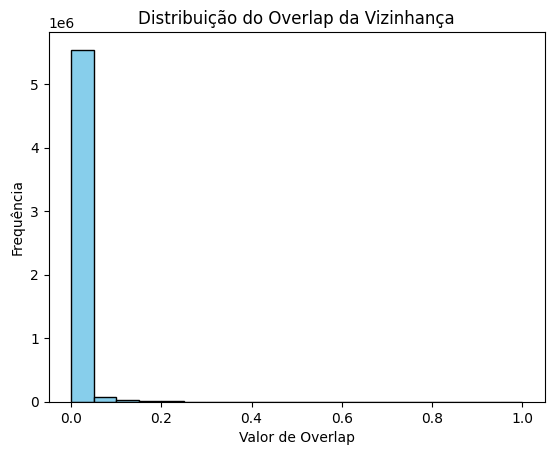

In [210]:
overlap_values = calculate_overlap(sub)

plt.hist(overlap_values, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribuição do Overlap da Vizinhança')
plt.xlabel('Valor de Overlap')
plt.ylabel('Frequência')
plt.show()

### g) Calcule a distância média e a distribuição das distâncias de todos os nodos da rede.


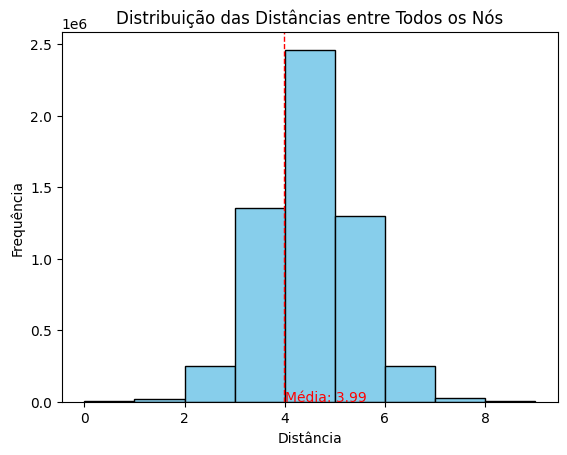

In [213]:
all_pairs_distances = dict(nx.all_pairs_shortest_path_length(sub))

# Calcular a distância média
total_distances = 0
num_pairs = 0
for source, distances in all_pairs_distances.items():
    for target, distance in distances.items():
        total_distances += distance
        num_pairs += 1

average_distance = total_distances / num_pairs
plt.axvline(average_distance, color='red', linestyle='dashed', linewidth=1)
plt.text(average_distance + 0.5, max(plt.hist(coefficients)[0]), f'Média: {average_distance:.2f}', color='red')

# Calcular a distribuição das distâncias
distances_list = []
for source, distances in all_pairs_distances.items():
    for target, distance in distances.items():
        distances_list.append(distance)

# Plotar a distribuição das distâncias
plt.hist(distances_list, bins=range(max(distances_list)+1), color='skyblue', edgecolor='black')
plt.title('Distribuição das Distâncias entre Todos os Nós')
plt.xlabel('Distância')
plt.ylabel('Frequência')
plt.show()

### h) Plote uma visualização do grafo


In [212]:
nx.write_gexf(sub, "grafo.gexf")


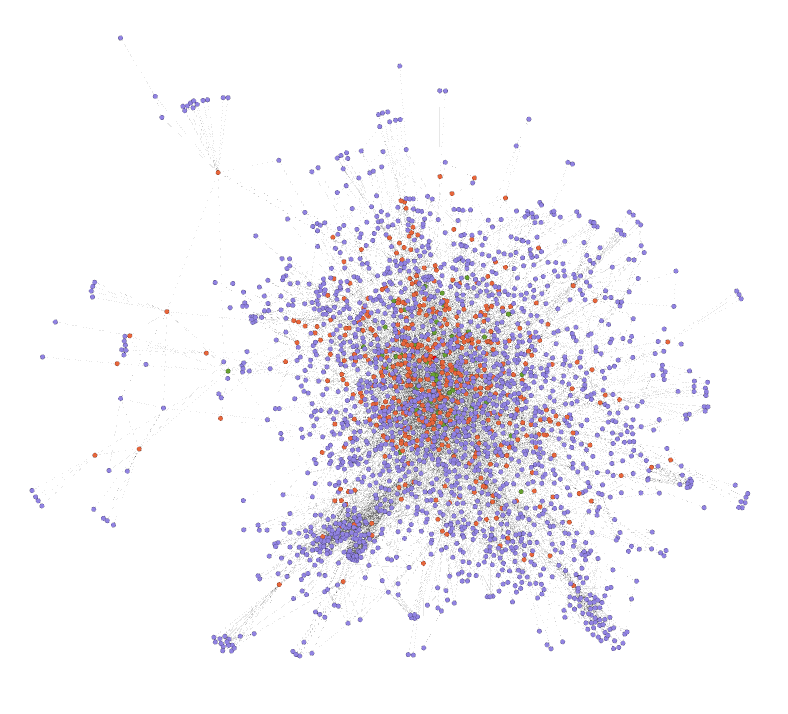

#### Legenda

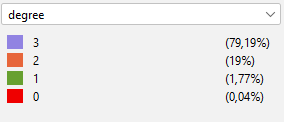